# Tabular ANN for Exploration of DEAP Dataset
SVM for quadrants

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

In [3]:
from fastai.tabular import *
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics

In [4]:
PATH = "/media/tris/tris_files/EEG_datasets/DMD/tabular"

In [5]:
df_raw = pd.read_csv('/media/tris/tris_files/EEG_datasets/DMD/tabular/dmd_deap_100modes_trials2.csv')
df_raw

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta41,zeta42,zeta43,zeta44,zeta45,zeta46,zeta47,zeta48,zeta49,zeta50
0,1,1,-0.233814,-0.969863,1.700171,0.720502,0.177535,-0.046507,1.072643,-0.120264,...,0.166065,0.280451,0.114258,0.109801,0.173911,0.157928,0.191574,0.137560,0.177926,0.207574
1,1,2,-0.993878,-0.016554,1.770978,-0.831954,0.097792,-0.621644,0.577972,1.328111,...,0.171891,0.106523,0.133571,0.194492,0.244793,0.159942,0.161214,0.197641,0.201198,0.182560
2,1,3,0.583622,0.629451,-0.735135,-1.448728,-0.377700,0.173252,-0.779868,-0.060316,...,0.123279,0.182684,0.162244,0.228377,0.186304,0.241429,0.172226,0.168193,0.269286,0.213699
3,1,4,-0.012731,1.519274,0.444013,0.687163,1.043211,-0.787845,0.113916,1.043668,...,0.190128,0.181409,0.141337,0.111817,0.194721,0.147402,0.199616,0.229632,0.167897,0.203443
4,1,5,-0.142715,0.161444,0.754088,1.518170,-1.628491,0.075984,-0.649745,-0.974299,...,0.123980,0.180104,0.127765,0.191395,0.117568,0.113275,0.221683,0.139448,0.163605,0.184403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,32,36,0.402701,0.698310,-0.014948,0.628291,0.727424,0.667963,0.460412,0.362815,...,0.096206,0.138511,0.115592,0.116468,0.176696,0.161931,0.155996,0.202108,0.212839,0.160285
1276,32,37,0.335937,0.687189,-0.209331,0.414581,-0.870939,0.714841,0.354585,-0.404037,...,0.114424,0.170725,0.240344,0.121923,0.173749,0.115140,0.189734,0.141533,0.227506,0.223675
1277,32,38,-0.822827,-0.549796,-1.011708,-1.082957,0.996392,-0.766131,-0.839676,0.825158,...,0.311907,0.115688,0.145812,0.138956,0.196466,0.161459,0.140366,0.235394,0.206119,0.178013
1278,32,39,-0.794072,0.698358,-0.938047,-5.002665,-0.472358,-0.935446,-1.867492,-1.125174,...,0.137895,0.114168,0.102125,0.262071,0.206464,0.166950,0.186174,0.153145,0.188538,0.212354


In [6]:
df_raw.iloc[[40],:]

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta41,zeta42,zeta43,zeta44,zeta45,zeta46,zeta47,zeta48,zeta49,zeta50
40,2,1,2.103902,-1.555795,-4.76561,1.745002,-0.038243,-1.276566,-0.490062,-2.453432,...,0.167794,0.265412,0.061066,0.129821,0.096107,0.267482,0.119305,0.125482,0.1402,0.182562


In [7]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/eeg-raw')

In [8]:
import pandas as pd
df_raw = pd.read_feather('tmp/eeg-raw') #lol raw sashimis and sushis
df_raw.head()

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta41,zeta42,zeta43,zeta44,zeta45,zeta46,zeta47,zeta48,zeta49,zeta50
0,1,1,-0.233814,-0.969863,1.700171,0.720502,0.177535,-0.046507,1.072643,-0.120264,...,0.166065,0.280451,0.114258,0.109801,0.173911,0.157928,0.191574,0.137560,0.177926,0.207574
1,1,2,-0.993878,-0.016554,1.770978,-0.831954,0.097792,-0.621644,0.577972,1.328111,...,0.171891,0.106523,0.133571,0.194492,0.244793,0.159942,0.161214,0.197641,0.201198,0.182560
2,1,3,0.583622,0.629451,-0.735135,-1.448728,-0.377700,0.173252,-0.779868,-0.060316,...,0.123279,0.182684,0.162244,0.228377,0.186304,0.241429,0.172226,0.168193,0.269286,0.213699
3,1,4,-0.012731,1.519274,0.444013,0.687163,1.043211,-0.787845,0.113916,1.043668,...,0.190128,0.181409,0.141337,0.111817,0.194721,0.147402,0.199616,0.229632,0.167897,0.203443
4,1,5,-0.142715,0.161444,0.754088,1.518170,-1.628491,0.075984,-0.649745,-0.974299,...,0.123980,0.180104,0.127765,0.191395,0.117568,0.113275,0.221683,0.139448,0.163605,0.184403


In [9]:
df_raw.iloc[[500],:]

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta41,zeta42,zeta43,zeta44,zeta45,zeta46,zeta47,zeta48,zeta49,zeta50
500,13,21,-0.636539,1.753147,-2.544426,-2.368353,-0.251682,-1.778326,0.345435,0.820399,...,0.267574,0.313899,0.172418,0.129389,0.193406,0.161502,0.171978,0.207269,0.203898,0.220929


In [10]:
path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s01.dat'
df_read = pickle.load(open(path, 'rb'), encoding='latin1')
labels=df_read['labels']
df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
df=df_tmp
for n in range (2,10):
    path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s0'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True)
for n in range (10,33):
    path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True) 

In [11]:
df=df.div(9) #normalize

In [12]:
df.loc[(df['valence'] >= 0.5) & (df['arousal'] >= 0.5), 'emotion_quad'] = 'HVHA'
df.loc[(df['valence'] <= 0.5) & (df['arousal'] >= 0.5), 'emotion_quad'] = 'LVHA'
df.loc[(df['valence'] <= 0.5) & (df['arousal'] <= 0.5), 'emotion_quad'] = 'LVLA'  
df.loc[(df['valence'] >= 0.5) & (df['arousal'] <= 0.5), 'emotion_quad'] = 'HVLA'
df.tail()

,valence,arousal,dominance,liking,emotion_quad
1275,0.434444,0.773333,0.646667,0.346667,LVHA
1276,0.312222,0.681111,0.673333,0.115556,LVHA
1277,0.338889,0.778889,0.566667,0.122222,LVHA
1278,0.443333,0.796667,0.538889,0.111111,LVHA
1279,0.794444,0.447778,1.000000,0.208889,HVLA


In [13]:
emotion_quad = df['emotion_quad']
# df_learn = df_raw.join(emotion_quad)
df_raw.head()

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta41,zeta42,zeta43,zeta44,zeta45,zeta46,zeta47,zeta48,zeta49,zeta50
0,1,1,-0.233814,-0.969863,1.700171,0.720502,0.177535,-0.046507,1.072643,-0.120264,...,0.166065,0.280451,0.114258,0.109801,0.173911,0.157928,0.191574,0.137560,0.177926,0.207574
1,1,2,-0.993878,-0.016554,1.770978,-0.831954,0.097792,-0.621644,0.577972,1.328111,...,0.171891,0.106523,0.133571,0.194492,0.244793,0.159942,0.161214,0.197641,0.201198,0.182560
2,1,3,0.583622,0.629451,-0.735135,-1.448728,-0.377700,0.173252,-0.779868,-0.060316,...,0.123279,0.182684,0.162244,0.228377,0.186304,0.241429,0.172226,0.168193,0.269286,0.213699
3,1,4,-0.012731,1.519274,0.444013,0.687163,1.043211,-0.787845,0.113916,1.043668,...,0.190128,0.181409,0.141337,0.111817,0.194721,0.147402,0.199616,0.229632,0.167897,0.203443
4,1,5,-0.142715,0.161444,0.754088,1.518170,-1.628491,0.075984,-0.649745,-0.974299,...,0.123980,0.180104,0.127765,0.191395,0.117568,0.113275,0.221683,0.139448,0.163605,0.184403


Text(0.5, 1.0, 'label')

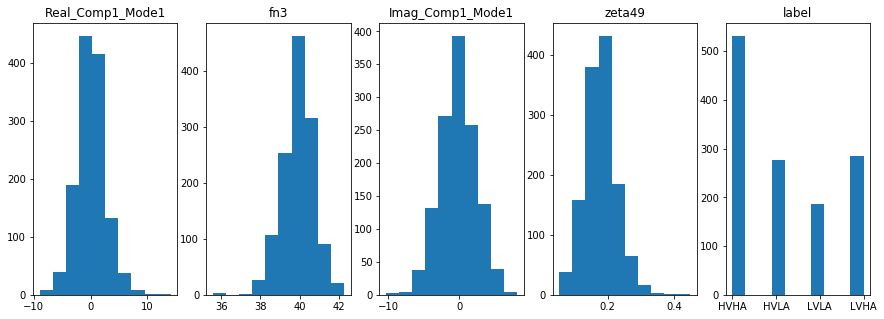

In [14]:
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
axs[0].hist(df_raw.Real_Comp1_Mode1)
axs[0].set_title('Real_Comp1_Mode1')
axs[1].hist(df_raw.fn3)
axs[1].set_title('fn3')
axs[2].hist(df_raw.Imag_Comp1_Mode1)
axs[2].set_title('Imag_Comp1_Mode1')
axs[3].hist(df_raw.zeta49)
axs[3].set_title('zeta49')
axs[4].hist(df.emotion_quad)
axs[4].set_title('label')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    df_raw, emotion_quad, test_size=0.2, shuffle=True)

In [36]:
classifier = svm.SVC(gamma=0.2, kernel='poly', degree=5)

In [37]:
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma=0.2, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
predicted = classifier.predict(X_test)

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma=0.2, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

        HVHA       0.39      0.66      0.49        99
        HVLA       0.30      0.19      0.23        53
        LVHA       0.32      0.21      0.25        53
        LVLA       0.29      0.14      0.19        51

    accuracy                           0.36       256
   macro avg       0.33      0.30      0.29       256
weighted avg       0.34      0.36      0.33       256


Confusion matrix:
[[65 13 12  9]
 [36 10  3  4]
 [34  4 11  4]
 [30  6  8  7]]


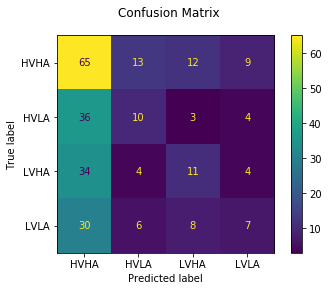

In [39]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)